## **US09**

- As a GSM, I want to know the exact costs referring to water consumption of specific green space so that I may manage these expenses efficiently. Therefore, within this US, the aim is to carry out a statistical analysis concerning the water consumption costs in all parks. The **”WaterUsed.csv”** file provide the necessary data to carry out the study. This file records daily water consumption (in m&sup3;) since the day each park opened. The amount paid for water is **0.7 €/m&sup3;**, up to a consumption of **50 m&sup3;**, with a fee of **15%** added for higher consumption levels.

The data file contains records of the following information: **”Park Identification”, ”Year”, ”Month”, ”Day”, ”Consumption”**. Consider this data in order to obtain the following outcomes:

- Barplot representing monthly water consumption, as a result of the following specifications given by the user: time period (**StartMonth, EndMonth**) and park identification.
- Average of monthly costs related to water consumption as a result of the following specifications given by the user: number of parks to be analyzed, and park identification.
- Consider the water consumption of every day that is recorded. The aim is to analyze and compare statistical indicators between the park with the highest and lowest water consumption. For these two parks, perform the following tasks and compare results: 
  - Calculate the mean, median, standard deviation, and the coefficient of skewness;
  - Build relative and absolute frequency tables (classified data), considering **5** classes;
  - Check if the data has outliers, using the outlier definition as values that deviate from the median by more than **1.5** times the interquartile range;
  - Graphically represent data through histograms with **10** classes.

### v2.2 Updates:

- The **”water consumption.csv”** file provide the necessary data to carry out the study. This file records daily water consumption (in m3) since the day each park opened. The amount paid for water is **0.7 €/m&sup3;**, up to a consumption of **1000m&sup3;/month**, with a fee of **15%** added for higher consumption levels.
- Consider the water consumption of every day that is recorded. The aim is to analyze and compare statistical indicators between the park with the highest and lowest (not null) water consumption. For these two parks, perform the following tasks and compare results: 
  - Calculate the mean, median, standard deviation, and the coefficient of skewness;
  - Build relative and absolute frequency tables (classified data), considering **5** classes;
  - Check if the data has outliers, using the outlier definition as values that deviate from the median by more than **1.5** times the interquartile range;
  - Graphically represent data through histograms with **10** and **100** classes.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats

# ------------------------------------------------------------------
# Constants for pricing
# ------------------------------------------------------------------

BASE_PRICE = 0.7                  # €/m^3
MAX_CONSUMPTION = 1000            # m^3/month
ADDITIONAL_FEE_RATE = 0.15        # 15%


####################################################################
#                       AUXILIARY FUNCTIONS                        #
####################################################################


# ------------------------------------------------------------------
# Function to print a message in red color (error message)
# ------------------------------------------------------------------

def print_red(message):
    print("\033[91m" + message + "\033[0m")

    
# ------------------------------------------------------------------
# Function to print a message in green color
# ------------------------------------------------------------------    

def print_green(message):
    print("\033[92m" + message + "\033[0m")

    
# ------------------------------------------------------------------
# Function to calculate cost based on water consumption
# ------------------------------------------------------------------

def calculate_cost(consumption):
    if consumption <= MAX_CONSUMPTION:
        return consumption * BASE_PRICE
    else:
        return (MAX_CONSUMPTION * BASE_PRICE) + ((consumption - MAX_CONSUMPTION) * BASE_PRICE * (1 + ADDITIONAL_FEE_RATE))


# ------------------------------------------------------------------
# Function to validate month
# ------------------------------------------------------------------

def validate_month(month):
    if month < 1 or month > 12:
        return False
    else:
        return True


# ------------------------------------------------------------------
# Function to validate year
# ------------------------------------------------------------------

def validate_year(year):
    current_year = pd.Timestamp.now().year
    if year < 1900 or year > current_year:
        return False
    else:
        return True


# ------------------------------------------------------------------
# Function to get and validate Park identification
# ------------------------------------------------------------------

def get_park_identification(consumption_df, park_num):
    while True:
        if park_num == 0:
            park = input("Enter park identification: ").lower()
        else:
            park = input(f"Enter park identification for park {park_num}: ").lower()
        
        if park not in consumption_df['Park'].str.lower().unique():
            print_red("Error: Park identification not found.\n")
            choice = input("Do you want to enter another park? (yes/no): ").lower()
            if choice != 'yes':
                print("Returning to the main menu.")
                raise ValueError("Return to main menu")  # Raise exception to return to main menu
                return None
        else:
            return park


# ------------------------------------------------------------------
# Function to validate number of parks
# ------------------------------------------------------------------

def validate_nr_parks(num_parks):
    if num_parks < 1 or num_parks > 20:
        return False
    else:
        return True


# ------------------------------------------------------------------
# Function to read the input file
# ------------------------------------------------------------------

def read_consumption_data():
    # Read consumption data from CSV file
    return pd.read_csv('water_consumption.csv', delimiter=';', decimal=",")


# ------------------------------------------------------------------
# Function to display the main menu
# ------------------------------------------------------------------

def display_menu():
    print("\nMenu:")
    print("1. Monthly Water Consumption")
    print("2. Average of monthly costs")
    print("3. Analyze and compare statistical indicators")
    print("0. Exit")



    
####################################################################
#                          MAIN FUNCTIONS                          #
####################################################################

# ------------------------------------------------------------------
# Funtion to calculate average of monthly costs across parks
# ------------------------------------------------------------------

def average_monthly_costs(consumption_df):
    park_ids = []
    
    # Get user input
    num_parks = int(input("\nEnter the number of parks to be analyzed (max. 20): "))
    while not validate_nr_parks(num_parks):
        print_red("Error: Invalid number of parks. Must be an integer. Max 20.")
        num_parks = int(input("Enter the number of parks to be analyzed (max. 20): "))
    
    try:
        for i in range(num_parks):
            park_id = get_park_identification(consumption_df, i+1)
            park_ids.append(park_id)
    except ValueError:
        return  # Return to main menu if ValueError is raised

    # Create an empty DataFrame to store the results
    results = []

    # Loop through each park
    for park_id in park_ids:
        # Filter DataFrame to include only rows for the current park
        park_df = consumption_df[consumption_df.iloc[:, 0].str.lower() == park_id.lower()].copy()

        # Group by year and month, then calculate total consumption for each month
        sum_by_month = park_df.groupby(['Year', 'Month']).agg({'Consumption': 'sum'}).reset_index()

        # Calculate total monthly cost using the calculate_cost function
        sum_by_month['Cost'] = sum_by_month['Consumption'].apply(calculate_cost)

        # Calculate the average monthly cost
        average_monthly_cost = sum_by_month['Cost'].mean()

        # Append the result to the results list
        results.append((park_id, average_monthly_cost))

    # Print the results
    print_green("\n***********************************************************")
    print("               Average Monthly Cost by Park")
    print_green("***********************************************************")

    #Checks the max lenght for the fields to be printed in order to align
    max_park_id_length = max(len(park_id) for park_id, _ in results)
    max_cost_length = max(len("{:.2f}€".format(avg_cost)) for _, avg_cost in results)
    alignment_width = max(max_park_id_length, max_cost_length) + 5  # 5 for additional padding

    for park_id, avg_cost in results:
        park_id_formatted = "{:<{width}}".format(park_id, width=alignment_width)
        avg_cost_formatted = "{:>{width}.2f}€".format(avg_cost, width=alignment_width)
        print("Park:", park_id_formatted, "Average Cost:", avg_cost_formatted)

    
# ------------------------------------------------------------------
# Function to calculate the Monthly Water Consumption
# ------------------------------------------------------------------

def monthly_water_consumption(consumption_df):
             
    try:
        # Get user inputs
        park = get_park_identification(consumption_df, 0)  # Get park identification
    except ValueError:
        return  # Return to main menu if ValueError is raised
    
    if park is not None:

        start_month = int(input("Enter the start month (1-12): "))
        while not validate_month(start_month):
            print_red("Error: Invalid start month.")
            start_month = int(input("Enter the start month (1-12): "))

        start_year = int(input("Enter the year for the start month entered: "))
        while not validate_year(start_year):
            print_red("Error: Invalid start year.")
            start_year = int(input("Enter the year for the start month entered: "))

        end_month = int(input("Enter the end month (1-12): "))
        while not validate_month(end_month):
            print_red("Error: Invalid end month.")
            end_month = int(input("Enter the end month (1-12): "))

        end_year = int(input("Enter the year for the end month entered: "))
        while not validate_year(end_year):
            print_red("Error: Invalid end year.")
            end_year = int(input("Enter the year for the end month entered: "))

        while end_year < start_year or (end_year == start_year and end_month < start_month):
            print_red("Error: End date must be after or equal to start date.")
            end_year = int(input("Enter the year for the end month entered: "))
            while not validate_year(end_year):
                print_red("Error: Invalid end year.")
                end_year = int(input("Enter the year for the end month entered: "))

        # Filter DataFrame to include only rows that match the inputs and the specified date range
        filtered_df = consumption_df[(consumption_df['Park'].str.lower() == park) & 
                                     ((consumption_df['Year'] > start_year) | ((consumption_df['Year'] == start_year) & (consumption_df['Month'] >= start_month))) & 
                                     ((consumption_df['Year'] < end_year) | ((consumption_df['Year'] == end_year) & (consumption_df['Month'] <= end_month)))]

        # Group by month and sum the values in the 'Consumption' column for each month
        sum_by_month = filtered_df.groupby(['Year', 'Month'])['Consumption'].sum().reset_index()

        # Create a formatted string with centered columns and right-aligned numbers
        formatted_output = sum_by_month.to_string(index=False, justify='center', float_format=lambda x: f'{x:>12.6f}')
        
        print_green("\n***************************************************")
        print("Monthly water consumption for park:", park)
        print_green("***************************************************")
        print("\n", formatted_output, "\n")

        # Create a bar plot representing monthly water consumption
        plt.figure(figsize=(10, 6))
        bars = plt.bar(range(len(sum_by_month)), sum_by_month['Consumption'])
        plt.xlabel('Month')
        plt.ylabel('Water Consumption (m$^3$)')
        plt.title('Monthly Water Consumption')
        plt.xticks(ticks=range(len(sum_by_month)), labels=[f"{month}-{year}" for month, year in zip(sum_by_month['Month'], sum_by_month['Year'])], rotation=45)

        # Annotate each bar with its corresponding value
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        
# ------------------------------------------------------------------
# Function that calculates the mean, median, standard deviation,
# and the coefficient of skewness, for highest and lowest
# consumption parks
# ------------------------------------------------------------------

def show_mmsds(consumption_df):

    # Group by park and calculate total water consumption for each park
    park_consumption = consumption_df.groupby('Park')['Consumption'].sum()

    # Identify park with the highest and lowest water consumption
    park_highest = park_consumption.idxmax()
    park_lowest = park_consumption.idxmin()

    # Filter data for parks with highest and lowest consumption
    highest_consumption_data = consumption_df[consumption_df['Park'] == park_highest]['Consumption']
    lowest_consumption_data = consumption_df[consumption_df['Park'] == park_lowest]['Consumption']

    # Calculate statistical indicators for the park with the highest consumption
    highest_mean = highest_consumption_data.mean()
    highest_median = highest_consumption_data.median()
    highest_std = highest_consumption_data.std()
    highest_skewness = stats.skew(highest_consumption_data, False)

    # Calculate statistical indicators for the park with the lowest consumption
    lowest_mean = lowest_consumption_data.mean()
    lowest_median = lowest_consumption_data.median()
    lowest_std = lowest_consumption_data.std()
    lowest_skewness = stats.skew(lowest_consumption_data, False)

    # Print statistical indicators
    print_green("\n*********************************************************************")
    print("Statistical Indicators for Park with Highest Consumption (", park_highest,"):")
    print_green("*********************************************************************")
    print(f"Mean: {highest_mean:.2f}")
    print(f"Median: {highest_median:.2f}")
    print(f"Standard Deviation: {highest_std:.2f}")
    print(f"Coefficient of Skewness: {highest_skewness:.2f}")

    print_green("\n*********************************************************************")
    print("Statistical Indicators for Park with Lowest Consumption (", park_lowest, "):")
    print_green("*********************************************************************")
    print(f"Mean: {lowest_mean:.2f}")
    print(f"Median: {lowest_median:.2f}")
    print(f"Standard Deviation: {lowest_std:.2f}")
    print(f"Coefficient of Skewness: {lowest_skewness:.2f}")


# ------------------------------------------------------------------
# Function that shows the relative and absolute frequency tables
# (classified data), considering 5 classes
# ------------------------------------------------------------------

def show_freq_table(consumption_df):
    
    # Convert the date components to a datetime object
    consumption_df['Date'] = pd.to_datetime(consumption_df[['Year', 'Month', 'Day']])

    # Calculate the total water consumption for each day for every park
    daily_consumption = consumption_df.groupby(['Park', 'Date'])['Consumption'].sum().reset_index()

    # Calculate the total water consumption for each park
    park_total_consumption = daily_consumption.groupby('Park')['Consumption'].sum()

    # Identify the park with the highest and lowest total water consumption
    park_highest = park_total_consumption.idxmax()
    park_lowest = park_total_consumption.idxmin()

    # Filter daily consumption data for the parks with highest and lowest consumption
    highest_park_data = daily_consumption[daily_consumption['Park'] == park_highest]
    lowest_park_data = daily_consumption[daily_consumption['Park'] == park_lowest]

    # Define the number of classes for frequency tables
    num_classes = 5

    # Calculate class width and bins for the classes
    def calculate_bins(data, num_classes):
        data_min = data.min()
        data_max = data.max()
        class_width = (data_max - data_min) / num_classes
        bins = [round(data_min + i * class_width, 1) for i in range(num_classes)]
        bins.append(data_max)  # Add the maximum value as the last bin
        return bins

    highest_bins = calculate_bins(highest_park_data['Consumption'], num_classes)
    lowest_bins = calculate_bins(lowest_park_data['Consumption'], num_classes)

    # Create frequency tables (classified data) for the park with highest consumption
    highest_frequency_table = pd.cut(highest_park_data['Consumption'], bins=highest_bins, include_lowest=True).value_counts().sort_index()
    highest_relative_frequency = highest_frequency_table / highest_park_data.shape[0]

    # Create frequency tables (classified data) for the park with lowest consumption
    lowest_frequency_table = pd.cut(lowest_park_data['Consumption'], bins=lowest_bins, include_lowest=True).value_counts().sort_index()
    lowest_relative_frequency = lowest_frequency_table / lowest_park_data.shape[0]

    # Present the data in the format provided
    def format_table(bins, frequency_table, relative_frequency):
        formatted_table = ""
        for i in range(num_classes):
            interval = f"{bins[i]:.1f}-{bins[i+1]:.1f}"
            absolute_freq = f"{frequency_table.iloc[i]:>5}"
            relative_freq = f"{(relative_frequency.iloc[i] * 100):6.2f}%"
            formatted_table += f"{interval:<12} {absolute_freq:<20} {relative_freq:<15}\n"
        return formatted_table

    print_green("\n***************************************************")
    print("Park with Highest Consumption:", park_highest)
    print_green("***************************************************")

    print("Classes     Absolute Frequency   Relative Frequency")
    print(format_table(highest_bins, highest_frequency_table, highest_relative_frequency))

    print_green("\n***************************************************")
    print("Park with Lowest Consumption:", park_lowest)
    print_green("***************************************************")
    
    print("Classes     Absolute Frequency   Relative Frequency")
    print(format_table(lowest_bins, lowest_frequency_table, lowest_relative_frequency))





# ------------------------------------------------------------------
# Function to detect outliers
# ------------------------------------------------------------------

def detect_outliers(data):
    median = data['Consumption'].median()
    q1 = data['Consumption'].quantile(0.25)
    q3 = data['Consumption'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data['Consumption'] < lower_bound) | (data['Consumption'] > upper_bound)]
    return outliers


# ------------------------------------------------------------------
# Function to print outliers
# ------------------------------------------------------------------

def print_outliers(park, outliers):
    
    print(f"Outliers for {park} Consumption:")
    print("{:^10}  {:^10}  {:^10}  {:^10}".format("Year", "Month", "Day", "Consumption"))
    print_green("-" * 51)
    
    for index, row in outliers.iterrows():
        # Format the consumption value to align with the decimal separator
        consumption_formatted = "{:.2f}".format(row['Consumption'])
        
        # Center align the year, month, day, and consumption value
        print("{:^10}  {:^10}  {:^10}  {:^10}".format(row['Year'], row['Month'], row['Day'], consumption_formatted))


# ------------------------------------------------------------------
# Funtion that checks if the data has outliers
# ------------------------------------------------------------------

def show_outliers(consumption_df):

    # Calculates the total water consumption for each park
    park_consumption = consumption_df.groupby('Park')['Consumption'].sum()
    
    # Identifies the parks with the highest and lowest water consumption
    park_with_highest_consumption = park_consumption.idxmax()
    park_with_lowest_consumption = park_consumption.idxmin()
    
    # For the identified parks extracts the consumption data for each
    highest_consumption_data = consumption_df[consumption_df['Park'] == park_with_highest_consumption]
    lowest_consumption_data = consumption_df[consumption_df['Park'] == park_with_lowest_consumption]
    
    # Detect outliers for the highest consumption park
    # outliers_highest = detect_outliers(highest_consumption_data['Consumption'])
    outliers_highest = detect_outliers(highest_consumption_data)
    
    # Detect outliers for the lowest consumption park
    # outliers_lowest = detect_outliers(lowest_consumption_data['Consumption'])
    outliers_lowest = detect_outliers(lowest_consumption_data)
    
    # Prints the results
    print_green("\n***************************************************")
    print(f"Park with Highest Consumption: {park_with_highest_consumption}")
    print_green("***************************************************")
    print_outliers(park_with_highest_consumption, outliers_highest)
    print_green("\n***************************************************")
    print(f"Park with Lowest Consumption: {park_with_lowest_consumption}")
    print_green("***************************************************")
    print_outliers(park_with_lowest_consumption, outliers_lowest)
    
    

# ------------------------------------------------------------------
# Funtion that graphically represent data through histograms with
# 10 / 100 classes
# ------------------------------------------------------------------



def show_graph(consumption_df, num_classes, show_column_labels, highest):

    # Group by park and calculate the total water consumption for each park
    park_consumption = consumption_df.groupby('Park')['Consumption'].sum()

    # Validate if the data for the graph is related with the park with the highest consumption or not
    # (highest is True)
    if highest:
        # Identify park with the highest water consumption
        park = park_consumption.idxmax()
    else:
        # Identify park with the lowest water consumption
        park = park_consumption.idxmin()
        
    # Filter data based oh the selection (highest/lowest)
    consumption_data = consumption_df[consumption_df['Park'] == park]
      
    # Create histogram with the number of classes
    plt.figure(figsize=(10, 6))
    hist = plt.hist(consumption_data['Consumption'], bins=num_classes, color='skyblue', edgecolor='black')

    # Add labels to each column if required
    if show_column_labels:
        for i in range(len(hist[0])):
            plt.text(hist[1][i] + (hist[1][i + 1] - hist[1][i]) / 2, hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')

    # Add labels and title
    plt.xlabel('Water Consumption (m$^3$)')
    plt.ylabel('Frequency')
    
    # Defines title for the graph if it is for park with the highest or lowest consumption
    if highest:
        # Title for park with the highest water consumption
        plt.title('Histogram of Water Consumption for Park with Highest Consumption')
    else:
        # Title for park with the lowest water consumption
        plt.title('Histogram of Water Consumption for Park with Lowest Consumption')
    

    # Show plot
    plt.grid(True)
    plt.show()
    

    
        
# ------------------------------------------------------------------
# Function to analyze and compare statistical indicators between the
# park with the highest and lowest water consumption
# ------------------------------------------------------------------

def analyze_consumption(consumption_df):
    show_mmsds(consumption_df)
    show_freq_table(consumption_df)
    show_outliers(consumption_df)
    show_graph(consumption_df, 10, True, True)
    show_graph(consumption_df, 100, False, True)
    show_graph(consumption_df, 10, True, False)
    show_graph(consumption_df, 100, False, False)


# ------------------------------------------------------------------
# Main function
# ------------------------------------------------------------------

def main():
    consumption_df = read_consumption_data()  # Read data once at the beginning

    while True:
        display_menu()
        choice = input("Enter your choice: \n")
        
        if choice == '0':
            print_green("Exiting program...\nThank you!")
            break
        elif choice == '1':
            monthly_water_consumption(consumption_df)
        elif choice == '2':
            average_monthly_costs(consumption_df)
        elif choice == '3':
            analyze_consumption(consumption_df)
        else:
            print_red("Invalid choice. Please enter a valid option.")

if __name__ == "__main__":
    main()



Menu:
1. Monthly Water Consumption
2. Average of monthly costs
3. Analyze and compare statistical indicators
0. Exit
Enter your choice: 
0
Exiting program...
Thank you!


### Monthly Water Consumption Analysis

1. **Trend Analysis:**
   - There is a noticeable fluctuation in consumption over the months, with some months showing higher consumption peaks compared to others.
   - A general increasing trend in consumption from January 2023 to July 2023, followed by a decrease in subsequent months, is observed.<br>
<br>

2. **Seasonal Patterns:**
   - The consumption data exhibits seasonal patterns, with higher consumption observed during certain months, possibly corresponding to seasonal factors such as weather conditions or peak usage periods.<br>
<br>

3. **Yearly Comparison:**
   - Comparing consumption between the years 2023 and 2024, there seems to be some variation. For instance, the average consumption in 2023 appears to be lower than in 2024 based on the available data, on homologous months.<br>
<br>

4. **Month-to-Month Variability:**
   - There is significant month-to-month variability in consumption, indicating that factors such as changes in weather, holidays, or special events may influence water usage patterns.<br>
<br>

5. **Forecasting and Planning:**
   - Understanding historical consumption patterns can aid in forecasting future consumption trends and planning resource allocation accordingly. For instance, identifying peak consumption periods can help utilities prepare for increased demand and ensure adequate supplies.<br>
<br>

6. **Efficiency and Conservation:**
   - Identifying months with unusually high consumption can highlight potential opportunities for efficiency improvements or conservation measures to reduce water usage and associated costs.<br>
<br>

Overall, analyzing monthly consumption data provides valuable insights into consumption patterns, trends, and potential areas for optimization in water resource management and planning.


### Monthly water consumption - Inputs and Outputs

#### Inputs (entered by user)

>Park: **Cidade**
>
>Start Month: **1**
>
>Start Year: **2023**
>
>End Month: **3**
>
>End Year: **2024**

#### Outputs

These are the screenshots of the output, when choosing the menu option _"1. Monthly Water Consumption"_

![Output Opt 1 1](O_US09_1_img1.png "Output Opt 1 1")

![Output Opt 1 2](O_US09_1_img2.png "Output Opt 1 2")

### Analysis of Average Monthly Costs by Park

The provided data on average monthly costs for each park, along with the water pricing structure, allows for several insights:

1. **Cost Disparity:**
   - There is a substantial difference in average monthly costs between the two parks. 
   - Park "cidade" has a significantly higher average cost (€2739.64) compared to park "arcaagua" (€191.43).<br>
<br>
2. **Potential Factors Contributing to Cost Difference:**
   - Infrastructure Differences: The higher average cost in park "cidade" could be attributed to differences in infrastructure, such as the size of the park, water distribution systems, or maintenance requirements.
   - Variations in water consumption patterns between the parks may also contribute to cost differences. For example, park "cidade" might have higher water demand due to larger facilities or more visitors.<br>
<br>

3. **Analysis:**
   - Park "cidade" likely exceeds the 1000 m&sup3;/month consumption threshold, resulting in additional fees due to the 15% surcharge for higher consumption levels.
   - Park "arcaagua" likely maintains consumption levels within the 1000 m&sup3;/month threshold, as its average cost aligns closely with the base rate.<br>
<br>

4. **Cost Management Implications:**
   - Understanding the cost implications of water consumption is crucial for effective budget planning and resource management for each park.
   - Park "cidade" may benefit from implementing water conservation measures or optimizing usage to reduce costs and ensure more sustainable water management practices.


### Average monthly costs by park - Inputs and Outputs

#### Inputs (entered by user)

>Number of parks: **2**
>
>Park #1: **Cidade**
>
>Park #2: **ArcaAgua**

#### Outputs

This is the screenshot of the output, when choosing the menu option _"2. Average of monthly costs"_

![Output Opt 2](O_US09_2_img1.png "Output Opt 2")

### Analysis of Park Water Consumption Data Between The Park With The Highest And Lowest Consumption

#### Statistical Indicators:

- **Cidade (Park with Highest Consumption):**
  - Mean: 116.24 m&sup3;
  - Median: 86.00 m&sup3;
  - Standard Deviation: 71.72 m&sup3;
  - Coefficient of Skewness: 3.99 (Positively skewed)

- **ArcaAgua (Park with Lowest Consumption):**
  - Mean: 9.00 m&sup3;
  - Median: 6.77 m&sup3;
  - Standard Deviation: 4.85 m&sup3;
  - Coefficient of Skewness: 2.16 (Positively skewed)

#### Outliers:

- **Cidade:**
  - Significant outliers (e.g., 491.40 m&sup3;, 922.65 m&sup3;) indicate extreme consumption events.

- **ArcaAgua:**
  - Outliers (e.g., 30.55 m&sup3;, 49.22 m&sup3;) are present but comparatively lower than Cidade's outliers.

#### Frequency Distribution:

- **Cidade:**
  - Majority of consumption in lower classes, but few instances of very high consumption.
  - Skewed distribution with a longer tail to the right.

- **ArcaAgua:**
  - Consumption more evenly distributed across classes, majority in lower classes.
  - Less skewed distribution compared to Cidade.

#### Management Implications:

- **Cidade:**
  - Measures to improve water efficiency and address leaks may be necessary.
  - Extreme consumption events requires investigation.

- **ArcaAgua:**
  - Regular analysis of consumption data recommended in order to optimize water management practices.

These analyses underscore the significance of data-driven decision-making in water resource management for parks, aiming for efficient and sustainable water usage.


### The Park With The Highest And Lowest Consumption - Outputs

These are the screenshots of the output, when choosing the menu option _"3. Analyze and compare statistical indicators"_

![Output 3 1](O_US09_3_img1.png "Output 3 1")

![Output 3 2](O_US09_3_img2.png "Output 3 2")

![Output 3 3](O_US09_3_img3.png "Output 3 3")

![Output 3 4](O_US09_3_img4.png "Output 3 4")

![Output 3 5](O_US09_3_img5.png "Output 3 5")

![Output 3 6](O_US09_3_img6.png "Output 3 6")

![Output 3 7](O_US09_3_img7.png "Output 3 7")

## Formulas

Absolute accumulated frequency up to class $i(N_i)$

$$\large N_i = \sum_{j=1}^{i} n_j$$

Accumulated frequency relative to class $i(F_i)$

$$\large F_i = \frac{N_i}{n} = \sum_{j=1}^{i} f_j = \frac{1}{n}\sum_{j=1}^{i} n_j$$

Absolute frequency of category $i(n_i)$

$$\large \sum_{i=1}^{c} n_i = n$$

Relative frequency of category $i(f_i)$

$$\large f_i = \frac{n_i}{n}$$

Arithmetic mean

$$\large \bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$$

Median $\tilde{x}$

$$\large \tilde{x} = \begin{cases}
\frac{x_\left( \frac{n}{2} \right) + x_\left( \frac{n}{2} + 1\right)}{2} & \text{, se } n \text{ for par} \\
x_\left( \frac{n}{2} + 1\right) & \text{, se } n \text{ for ímpar}
\end{cases}$$

Total amplitude, $r$

$$\large r = \max\{x_1, x_2, \ldots, x_n\} -  \min\{x_1, x_2, \ldots, x_n\} = x_\left( n \right) - x_\left( 1 \right)$$

Interquartile range, $r_q$

$$\large r_q = q_3 - q_1$$

Variance $s^2$

$$\large s^2 = \frac{1}{n-1}\sum_{i=1}^{n} \left( x_i - \bar{x}\right)^2$$

Standard deviation $s$

$$\large s = \sqrt{s^2}$$

Centered sample moment of order $r$

$$\large m_r = \frac{1}{n}\sum_{i=1}^{n} \left( x_i - \bar{x}\right)^r$$

Sampling coefficient of skewness

$$\large a_3 = \frac{m_3}{s^3}$$

----------------------------------------------------------------

## US10

As a GSM, I want to know which piece(s) of equipment is/are used in each day so that I can understand the users’ preferences. 
Consider that the park has several equipment like, for instance, walking trails, picnic area and exercise gymnastics equipment. 
At the park exit there is an electronic device with a list of all the equipment, in which the user(s) must indicate the equipment they used that day.

In the file **”EquipmentUsed.csv”** the choices of 1000 users are recorded. 

Make a pie chart representing, in percentage, the use of each piece of equipment

Equipment
walking trails           219
picnic area              181
rest benches             176
children’s playground    139
toilletes                113
drinking fountains       101
exercise machines         71
Name: count, dtype: int64


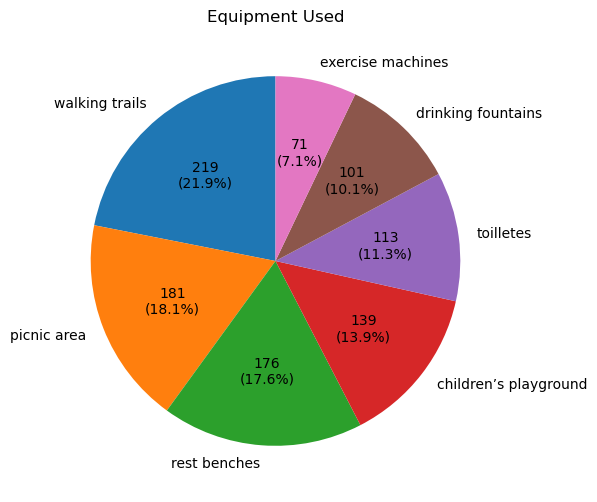

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read data from file
file = pd.read_csv('EquipmentUsed.csv')

# count number of equipment used
count = file['Equipment'].value_counts()

# show data for each piece of equipment
print(count)

# create a pie chart
plt.figure(figsize=(8,6))
pie_chart = count.plot(kind='pie', autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(count) / 100, p), startangle=90)

plt.title('Equipment Used')
plt.ylabel('')
plt.show()

### Analysis and Interpretation of the results

O gráfico apresenta os seguintes valores, por ordem de utilização:

| Equipamento          | Utilizadores | %      |
|:---------------------|:------------:|:------:|
|walking trails        |   219        | 21,9%  |
|picnic area           |   181        | 18,1%  |
|rest benches          |   176        | 17,6%  |
|children’s playground |   139        | 13,9%  |
|toilletes             |   113        | 11,3%  |
|drinking fountains    |   101        | 10,1%  |
|exercise machines     |    71        |  7,1%  |

Com estes valores podemos concluir que neste parque, "walking trails" são os equipamentos mais utilizados e "exercise machines" são os equipamentos menos utilizado.

------------------------------------------------------------------------------------------------

## US11

As a GSM, I want to be able to collect data from the user portal about the use of the park, so that I may understand the use of the park by different age groups. 
To analyse the use of the park by age groups, a three-question survey was inserted in the user portal:

| Question                                        | Answer type                            |
|:-----------------------------------------------:|:---------------------------------------|
| Age range                                       | 1 - Child (up to 15 years old)         |
|                                                 | 2 - Adult (between 16 to 65 years old) |
|                                                 | 3 - Senior (over 65 years old)         |
| Would you recommend the park to others?         | Y/N                                    |
| How many times do you visit the park per month? | Numeric                                |


The obtained responses are recorded in the **”Inquiry.csv”** file.

- Indicate the type of each of the three variables.
- Indicate the proportion of users from each age group who would recommend the park to others.
- Create a boxplot for each age group, regarding the monthly frequency of use of the park, and draw the main conclusions obtained from this type of graph.


Apresenta os valores agrupados
            Visits                                               
             count      mean       std  min  25%  50%   75%   max
Escalao Y/N                                                      
1       N     69.0  3.405797  1.751628  1.0  2.0  3.0   5.0   6.0
        Y     62.0  3.354839  1.793401  1.0  2.0  3.0   5.0   6.0
2       N     83.0  4.192771  2.292394  1.0  2.0  4.0   6.0   8.0
        Y     99.0  4.606061  2.298261  1.0  2.5  5.0   7.0   8.0
3       N    102.0  6.529412  3.114024  1.0  4.0  7.0   9.0  12.0
        Y     85.0  6.470588  3.520647  1.0  4.0  6.0  10.0  12.0
Escalao
1    47.33
2    54.40
3    45.45
dtype: float64


<Figure size 1000x600 with 0 Axes>

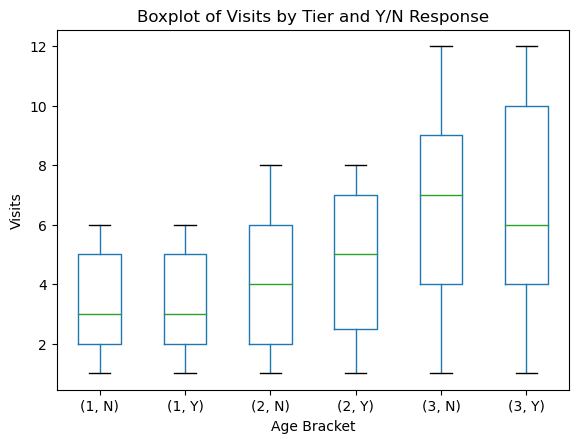

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read data from file
file = pd.read_csv('Inquiry.csv', delimiter=';', decimal=",")

# group by age
grouped = file.groupby('Escalao')

print("\nApresenta os valores agrupados")
grouped2 = file.groupby(['Escalao', 'Y/N'])
print(grouped2.describe())

# Indicate the type of each variable



# Indicate the proportion of users from each age group who would recommend the park
recommendation_proportion = grouped.apply(lambda x: round((x['Y/N'] == 'Y').mean() * 100, 2))
print(recommendation_proportion)

# make boxplot
plt.figure(figsize=(10, 6))
file.boxplot(column='Visits', by=['Escalao', 'Y/N'], grid=False)
plt.title('Boxplot of Visits by Tier and Y/N Response')
plt.xlabel('Age Bracket')
plt.ylabel('Visits')
plt.suptitle('')
plt.show()

## Analysis and Interpretation of the results

### Tier 1:
- **No:**
  - Average visits: ~3.41
  - Standard deviation: ~1.75
  - Min visits: 1, Max visits: 6
- **Yes:**
  - Average visits: ~3.35
  - Standard deviation: ~1.79
  - Min visits: 1, Max visits: 6

### Tier 2:
- **No:**
  - Average visits: ~4.19
  - Standard deviation: ~2.29
  - Min visits: 1, Max visits: 8
- **Yes:**
  - Average visits: ~4.61
  - Standard deviation: ~2.30
  - Min visits: 1, Max visits: 8

### Tier 3:
- **No:**
  - Average visits: ~6.53
  - Standard deviation: ~3.11
  - Min visits: 1, Max visits: 12
- **Yes:**
  - Average visits: ~6.47
  - Standard deviation: ~3.52
  - Min visits: 1, Max visits: 12

Additionally, the mean visits for each tier are as follows:
- Tier 1: 47.33
- Tier 2: 54.40
- Tier 3: 45.45

----------------------------------------------------------------

### Self-Evaluation

| Student Number | Student Name     | Evaluation |
|:--------------:|:-----------------|:----------:|
| 1120629        | Paulo Silva      | **20%**    |
| 1201933        | Manuel Marques   | **20%**    |
| 1220961        | Alexandre Guerra | **20%**    |
| 1221967        | Paulo Pereira    | **20%**    |
| 1230401        | Rui Pinto        | **20%**    |